# Miscellanous -For Visualization Lecture

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulate a similar scatterplot with gridlines and a trendline

np.random.seed(0)
x = np.random.normal(20, 5, 200)
y =0.75 * x + np.random.normal(0, 3, 200)
x_sorted = np.sort(x)
poly = np.poly1d(np.polyfit(x, y, 2))
y_poly = poly(x_sorted)
# Create the figure


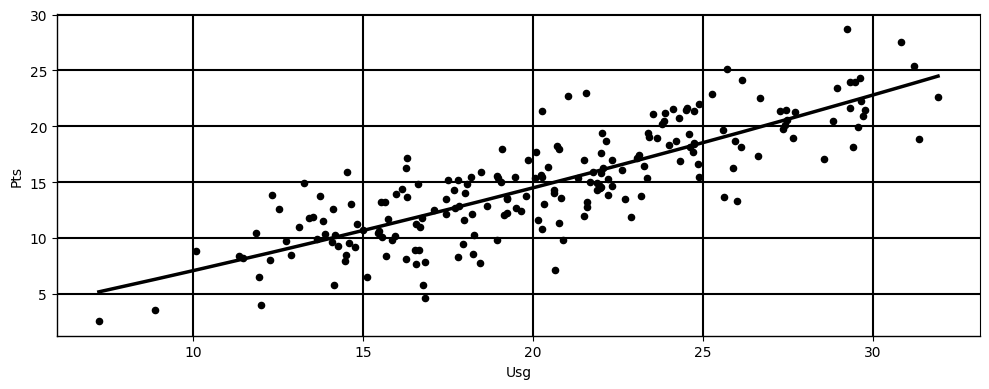

In [2]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x, y, color='black', s=20)

# Add a trendline
m, b = np.polyfit(x, y, 1)
ax.plot(x_sorted, y_poly, linewidth=2.5, color='black')

#Customize gridlines
ax.grid(True, which ='both', color ='black', linewidth =1.5)

#Add labels
ax.set_xlabel('Usg')
ax.set_ylabel('Pts')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
plt.tight_layout()
plt.show()

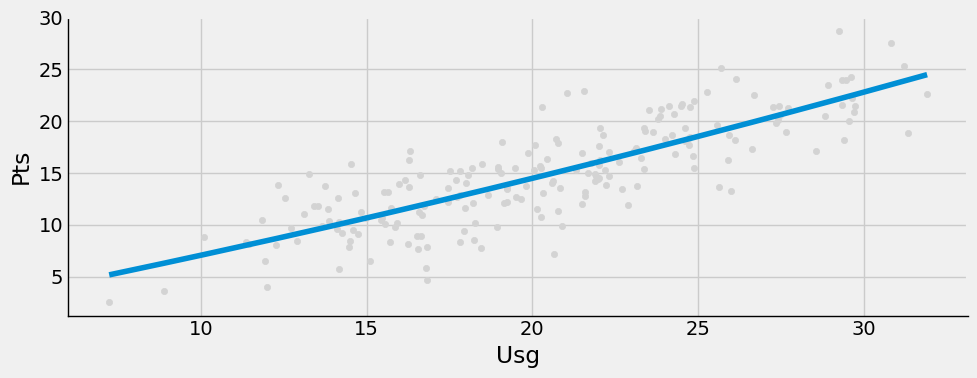

In [3]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10, 4))
  ax.scatter(x,y, color ='lightgrey', s=20)

  # Add a trendline
  m, b = np.polyfit(x, y, 1)
  ax.plot(x_sorted, y_poly, linewidth = 4)

  #Customize gridlines
  #ax.grid(True, which ='both', color = 'black', linewidth = 1.5)

  #Add labels
  ax.set_xlabel('Usg')
  ax.set_ylabel('Pts')
  ax.spines['bottom'].set_linewidth(1)
  ax.spines['left'].set_linewidth(1)
  ax.spines['bottom'].set_color('black')
  ax.spines['left'].set_color('black')
  plt.tight_layout()
  plt.show()

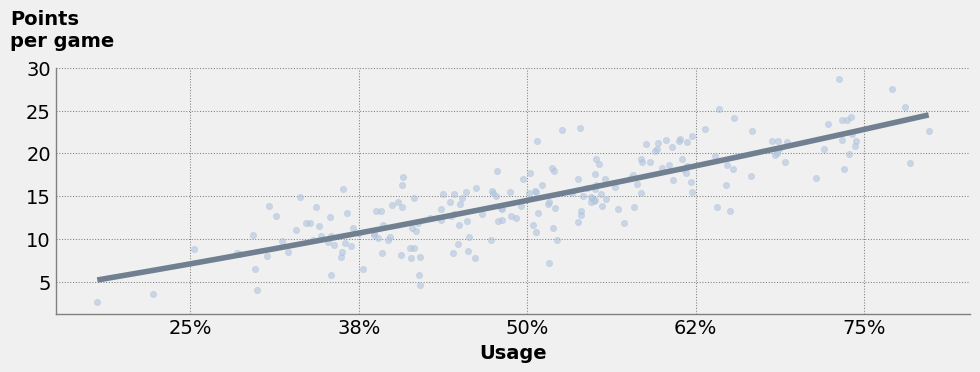

In [4]:
# Create the plot again with y-axis label positioned at the top, horizontally
from matplotlib.ticker import PercentFormatter
with plt.style.context ('fivethirtyeight'):

  fig, ax = plt.subplots(figsize=(10,4))

  #Plot lighter data points and smooth curve
  ax.scatter(x, y, color ='lightsteelblue', s = 20, alpha =0.6)
  ax.plot(x_sorted, y_poly, color='slategray', linewidth = 4)

  #Set x-axis label as before
  ax.set_xlabel('Usage', fontsize=14, weight ='bold')

  #Remove default y-label
  ax.set_ylabel('')

  #Add custom y-label at the top, horizontal
  ax.text(-0.05, 1.07, 'Points\nper game', transform=ax.transAxes,
          fontsize=14, weight ='bold', ha = 'left', va = 'bottom')

  #Light, dotted gridlines
  ax.grid(True, which='major', linestyle=':', linewidth=0.75, color='gray')

  #Simplify spines
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

  ax.spines['bottom'].set_color('gray')
  ax.spines['left'].set_color('gray')
  ax.spines['bottom'].set_linewidth(1)
  ax.spines['left'].set_linewidth(1)

  #Format x-axis ticks to percentages

  ax.xaxis.set_major_formatter(PercentFormatter(xmax=40))

  plt.tight_layout()
  plt.show()

In [5]:
# Re-import necessary libraries due to code execution environment reset

import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(0, 2.7 * np.pi, 300)

#Generate multiple sine wave lines with pahse shifts
# lines = [np.sin(x + i) for i in range(5)]
# lines = [np.sin(x + i * 0.2) for i in range(5)]
lines = [(1  + 0.2 * i) * np.sin(x + i * 0.2) for i in range (5)]

/tmp/ipython-input-7-1648002742.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('viridis')


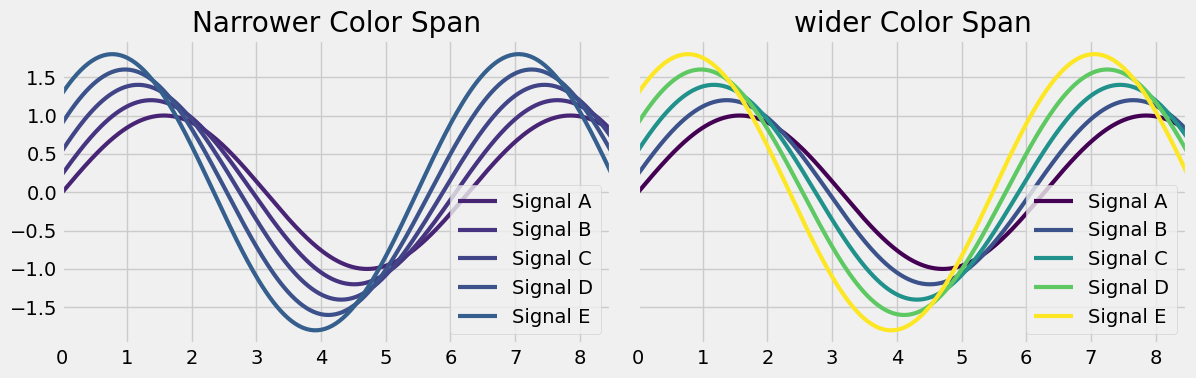

In [7]:
#Recreate the figure using the 'viridis' colormap with narrow and wide color selections
from matplotlib.cm import get_cmap

#Get the 'viridis' colormap
viridis = get_cmap('viridis')

#Select 5 close-together colors from the start of the colormap(narrow range)
narrow_colors = [viridis(i) for i in np.linspace(0.1, 0.3, 5)]

#Select 5 colors spread across the entire colormap (wide range)
wide_colors = [viridis(i) for i in np.linspace(0, 1, 5)]

# Create subplots

with plt.style.context('fivethirtyeight'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
  # Plot narrow color range
  for i in range(5):
    ax1.plot(x, lines[i],
             linewidth=3,
             color = narrow_colors[i],
             label= f"Signal {chr(65 + i)}" #Signal A, Signal B, ....
             )
    ax1.set_title("Narrower Color Span")
    ax1.legend(loc= 'lower right')

    # Plot wide color range

  for i in range (5):
      ax2.plot(x, lines[i], linewidth = 3,
               color=wide_colors[i], label=f"Signal {chr(65 + i)}" # Signal A, Signal B, ...
               )
      ax2.set_title("wider Color Span")
      ax2.legend(loc = 'lower right')

      ax1.set_xlim(0, 2.7 *np.pi)
      ax2.set_xlim(0, 2.7 * np.pi)

      plt.tight_layout()

plt.show()

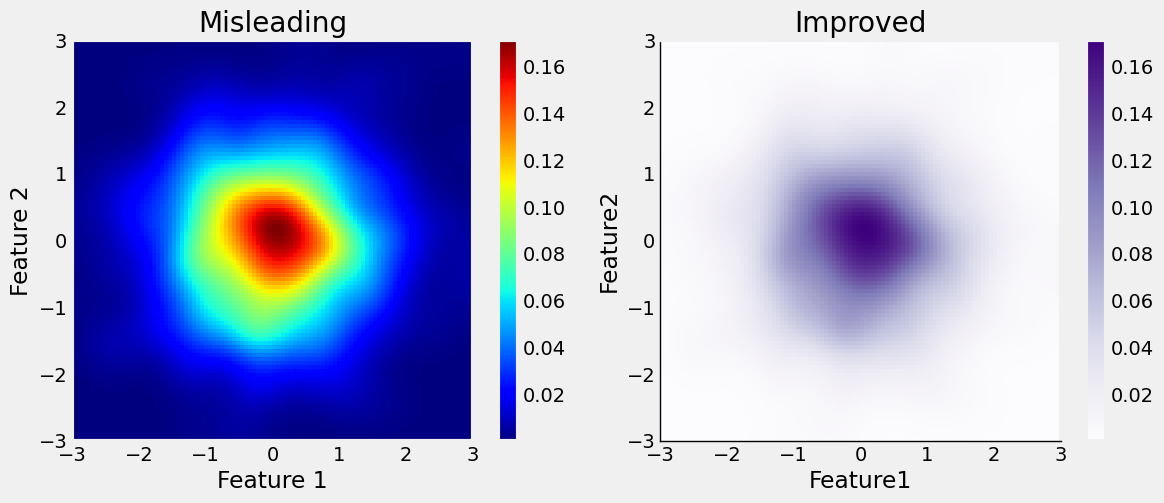

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Generate Synthetic 2D data
x = np.random.normal(0, 1, 1000)
y = np.random.normal (0, 1, 1000)

# Create a 2D desnsity estimate
xy = np.vstack([x, y])
kde = gaussian_kde(xy)
xgrid = np.linspace(-3,3,100)
ygrid = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

with plt.style.context('fivethirtyeight'):

  #Plot side-by-side heatmaps
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

  #First heatmap with 'jet' color map
  im1 = ax1.imshow(Z, extent = (-3, 3, -3, 3), origin = 'lower', cmap = 'jet')
  ax1.set_title('Misleading')
  ax1.set_xlabel('Feature 1')
  ax1.set_ylabel('Feature 2')
  plt.colorbar (im1, ax=ax1)

  #Second heatmap with 'Purples' colormap
  im2 = ax2.imshow(Z, extent=(-3, 3, -3, 3), origin ='lower', cmap ='Purples')
  ax2.set_title('Improved')
  ax2.set_xlabel('Feature1')
  ax2.set_ylabel('Feature2')
  plt.colorbar(im2, ax=ax2)

  ax2.spines['bottom'].set_color('black')
  ax2.spines['left'].set_color('black')
  ax2.spines['bottom'].set_linewidth(1)
  ax2.spines['left'].set_linewidth(1)


  #hide gridlines
  ax1.grid(False)
  ax2.grid(False)

  plt.tight_layout()
  plt.show()